<a href="https://colab.research.google.com/github/fitditcorp4/research/blob/main/Copy_of_weekly_dataset02022023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports library
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas.plotting import autocorrelation_plot
from random import randrange
from statsmodels.tsa.seasonal import seasonal_decompose
#from pandas import datetime
from datetime import datetime
import numpy as np
from pandas import read_json
from pandas import read_csv
from numpy import array
import matplotlib.colors as colors
import matplotlib.cm as cm
from pylab import rcParams
import warnings
import itertools
from pandas import Series
# plt.style.use('fivethirtyeight')
plt.style.use('classic')
%matplotlib inline

In [ ]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 1000)

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter

<function google.colab.data_table.enable_dataframe_formatter()>

In [ ]:
df0 = pd.read_json('https://oilspillmonitor.ng/api/spill-data.php?dataset=nosdra&format=json')

In [ ]:
 df0

,id,status,company,incidentnumber,incidentdate,contaminant,estimatedquantity,sitelocationname,spillareahabitat,lastupdatedby,cause,updatefor,latitude,longitude,statesaffected,attachments,jivdate,lga,zonaloffice,certificatedate,certificatenumber,formadate,reportdate,spillstopdate,initialcontainmentmeasures,descriptionofimpact,formbdate,formcdate,jivpresent,typeoffacility,cleanupcompleteddate,cleanupmethods,cleanupdate,quantityrecovered,postcleanupinspectiondate,finalsamplingdate,estimatedspillarea,remediationstart,remediationtype,remediationend,postimpactassessmentdate,finallabresultsdate
0,2,confirmed,ADDAX,HSE/OBO/0611/101,2006-11-23,cr,225,Subsea Pipeline @ Mimbo Platform (OML123),of,NOSDRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,confirmed,ADDAX,HSE/OBO/0612/108,2006-12-18,cr,0.5,EBNE04HT @ Ebughu Platform (OML 123),of,NOSDRA,eqf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,confirmed,ADDAX,HSE/OBO/0612/110,2006-12-27,cr,25,South East of BOGI Platform,of,NOSDRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,confirmed,ADDAX,HSE/OBO/0706/166,2007-05-14,cr,2,Adanga Platform,of,NOSDRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,confirmed,ADDAX,HSE/OBO/0708/201,2007-08-16,gs,NaN,"Izombe Well #10LS 4"" Flowline",la,NOSDRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16437,268127,confirmed,CHEVRON,NOSDRA/009/2023,2023-01-22,no,NaN,18'' DIBI-ABITEYE PIPELINE RoW AT DIBI.,sw,2023-02-08 WA003,sab,268127.0,5.7339444,5.2176944,DE,"[{""url"":""data/attachments/t186274821c1/CJEVRON...",2023-01-31,Warri-North,wa,NaN,NaN,NaN,2023-01-23,NaN,NaN,4'' Ball valve and double flange with pipe ext...,NaN,NaN,"nosdra,cmmnt,cmpny,dpr,mnstry",pl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16438,268124,confirmed,CHEVRON,NOSDRA/006/2023,2023-01-13,no,NaN,12'' OPUEKEBA-OLERO 12 ROW AT OPUAMA.,sw,2023-02-08 WA003,sab,268124.0,5.9068611,5.1013056,DE,"[{""url"":""data/attachments/t186273806dd/CJEVRON...",2023-01-30,Warri-North,wa,NaN,NaN,NaN,2023-01-14,NaN,NaN,12'' Mother Valve illegally attached at 12 O'c...,NaN,NaN,"nosdra,cmmnt,cmpny,dpr,mnstry",fl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16439,268123,confirmed,CHEVRON,NOSDRA/007/2023,2023-01-13,no,NaN,12'' OPUEKEBA-OLERO 12 RoW AT OPUAMA.,sw,2023-02-08 WA003,sab,268123.0,5.8866667,5.0988889,DE,"[{""url"":""data/attachments/t186272cb460/CJEVRON...",2023-01-30,Warri-North,wa,NaN,NaN,NaN,2023-01-14,NaN,NaN,3'' Hot tap Valve illegally attached at 12 O'c...,NaN,NaN,"nosdra,cmmnt,cmpny,dpr,mnstry",fl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16440,268122,confirmed,CHEVRON,NOSDRA/008/2023,2023-01-13,no,NaN,12'' OPUEKEBA-OLERO 12 ROW AT RMP 6 OPUAMA.,sw,2023-02-08 WA003,sab,268122.0,5.9068611,5.1013056,DE,"[{""url"":""data/attachments/t186271a9c79/CJEVRON...",2023-01-30,Warri-North,wa,NaN,NaN,NaN,2023-01-14,NaN,NaN,3'' Ballvalve with about 2'' pipe connection m...,NaN,NaN,"nosdra,cmmnt,cmpny,dpr,mnstry",pl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1 = df0.loc[df0['status'].isin(['confirmed', 'reviewed'])]

In [ ]:
#df1['incidentdate'].value_counts()

In [ ]:
df1.replace(to_replace='20014-07-08', value='2014-07-08',inplace=True)  # Replaces a typograpical error
df1.replace(to_replace='2016-01-13 AB008', value='2016-01-13',inplace=True)
df1.replace(to_replace='2016-04-14 AB014', value='2016-01-13',inplace=True)
df1.replace(to_replace='2019-08-19 PH133', value='2019-08-19',inplace=True)
df1.replace(to_replace='2019-08-19 PH133, 2020-12-15 PH030, 2021-09-17 PH012, 2021-09-20 PH012, 2021-10-31 PH012', value='2019-08-19',inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [ ]:
df1.incidentdate.isna().sum()

590

In [ ]:
df1.loc[pd.isnull(df1['incidentdate']), 'incidentdate'] = df1.reportdate
df1.loc[pd.isnull(df1['incidentdate']), 'incidentdate'] = df1.formadate
df1.loc[pd.isnull(df1['incidentdate']), 'incidentdate'] = df1.jivdate
df1.loc[pd.isnull(df1['incidentdate']), 'incidentdate'] = df1.lastupdatedby

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
df1.incidentdate.isna().sum()

0

In [ ]:
df1['contaminant'] = df1['contaminant'].fillna('notavailable')
df1.loc[df1['contaminant'].str.startswith('other'), 'contaminant'] = 'other'
df1.loc[df1['contaminant'].str.startswith('oth'), 'contaminant'] = 'other'
df1.loc[df1['contaminant'].str.startswith('re'), 'contaminant'] = 're'
df1.loc[df1['contaminant'].str.startswith('Die'), 'contaminant'] = 're'
df1.loc[df1['contaminant'].str.startswith('not'), 'contaminant'] = 'na'
df1.loc[df1['contaminant'].str.startswith('Con'), 'contaminant'] = 'co'
df1.loc[df1['contaminant'].str.startswith('CON'), 'contaminant'] = 'co'
df1.loc[df1['contaminant'].str.startswith('co'), 'contaminant'] = 'co'
df1.loc[df1['contaminant'].str.startswith('NIL'), 'contaminant'] = 'na'
df1.loc[df1['contaminant'].str.startswith('LPFO'), 'contaminant'] = 're'
df1.loc[df1['contaminant'].str.startswith('Pro'), 'contaminant'] = 'other'
df1.loc[df1['contaminant'].str.startswith('sheen'), 'contaminant'] = 'other'
df1.loc[df1['contaminant'].str.startswith('Ass'), 'contaminant'] = 'other'
df1.loc[df1['contaminant'].str.startswith('gas'), 'contaminant'] = 'ga'
df1.loc[df1['contaminant'].str.startswith('wa'), 'contaminant'] = 'na'
df1.loc[df1['contaminant'].str.startswith('F'), 'contaminant'] = 'na'
df1.loc[df1['contaminant'].str.startswith('0'), 'contaminant'] = 'na'
df1.loc[df1['contaminant'].str.startswith('gs'), 'contaminant'] = 'ga'
df1.loc[df1['contaminant'].str.startswith('Crude'), 'contaminant'] = 'cr'
df1.loc[df1['contaminant'].str.startswith('crude'), 'contaminant'] = 'cr'

<ipython-input-12-25e6b16a420f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['contaminant'] = df1['contaminant'].fillna('notavailable')
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df1.loc[df1['contaminant'].str.startswith('GAS'), 'contaminant'] = 'ga'
df1.loc[df1['contaminant'].str.startswith('None'), 'contaminant'] = 'no'

In [ ]:
df1.contaminant.unique()

array(['cr', 'ga', 'other', 'na', 'ch', 're', ' ', 'co', 'no',
       'Non-Leaking', 'Non leaking'], dtype=object)

In [ ]:
df2 = df1.loc[df1['contaminant'].isin(['cr', 're', 'co', 'ch'])]

In [ ]:
df2.estimatedquantity.isna().sum()

2340

In [ ]:
df2.loc[df2['estimatedquantity'].str.startswith('0', na=False), 'estimatedquantity'] = df2['estimatedquantity'].replace(',', '.',  regex=True)
df2['estimatedquantity'] = df2['estimatedquantity'].replace(',', '',  regex=True)
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('bbl', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('BBL', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('Bbl', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('Barrel', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('BARREL', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('bblS', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('BBLS', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('barrels', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('Barrels', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('I', '1')

<ipython-input-17-bf50b7c2b421>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['estimatedquantity'] = df2['estimatedquantity'].replace(',', '',  regex=True)
<ipython-input-17-bf50b7c2b421>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('bbl', '')
<ipython-input-17-bf50b7c2b421>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [ ]:
df2.loc[df2['estimatedquantity'].str.startswith('0', na=False), 'estimatedquantity'] = df2['estimatedquantity'].replace(',', '.',  regex=True)
df2['estimatedquantity'] = df2['estimatedquantity'].replace(',', '',  regex=True)
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('bbl', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('BBL', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('Bbl', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('Barrel', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('BARREL', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('bblS', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('BBLS', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('barrels', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('Barrels', '')
df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('I', '1')

<ipython-input-18-bf50b7c2b421>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['estimatedquantity'] = df2['estimatedquantity'].replace(',', '',  regex=True)
<ipython-input-18-bf50b7c2b421>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['estimatedquantity'] = df2['estimatedquantity'].str.replace('bbl', '')
<ipython-input-18-bf50b7c2b421>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [ ]:
df3 = df2.loc[(df2['incidentdate'] > '2005-12-31') & (df2['incidentdate'] <'2022-12-31')]

In [ ]:
df3['incidentdate'] = pd.DatetimeIndex(df3['incidentdate'])

<ipython-input-20-3ce1f0b5bdb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['incidentdate'] = pd.DatetimeIndex(df3['incidentdate'])


In [ ]:
df3.estimatedquantity = pd.to_numeric(df3.estimatedquantity, errors = 'coerce')

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df3.columns

Index(['id', 'status', 'company', 'incidentnumber', 'incidentdate', 'contaminant', 'estimatedquantity', 'sitelocationname', 'spillareahabitat', 'lastupdatedby', 'cause', 'updatefor', 'latitude', 'longitude', 'statesaffected', 'attachments', 'jivdate', 'lga', 'zonaloffice', 'certificatedate', 'certificatenumber', 'formadate', 'reportdate', 'spillstopdate', 'initialcontainmentmeasures', 'descriptionofimpact', 'formbdate', 'formcdate', 'jivpresent', 'typeoffacility', 'cleanupcompleteddate', 'cleanupmethods', 'cleanupdate', 'quantityrecovered', 'postcleanupinspectiondate', 'finalsamplingdate', 'estimatedspillarea', 'remediationstart', 'remediationtype', 'remediationend', 'postimpactassessmentdate', 'finallabresultsdate'], dtype='object')

In [ ]:
dfbi =  df3[['incidentdate','company','contaminant','estimatedquantity','spillareahabitat','cause']]
dfbii = df3.set_index('incidentdate')

In [ ]:
from google.colab import files

In [ ]:
dfbi.to_csv('dfbii.csv')

In [ ]:
#files.download('dfbii.csv')

In [ ]:
df4w = df3.groupby([pd.Grouper(key='incidentdate', freq='W')])['estimatedquantity'].agg(['sum','size'])
df4m = df3.groupby([pd.Grouper(key='incidentdate', freq='M')])['estimatedquantity'].agg(['sum','size'])

In [ ]:
df4m.tail()

,sum,size
incidentdate,,
2022-08-31,863.269540,67
2022-09-30,493.283100,60
2022-10-31,538.790554,43
2022-11-30,1240.313000,19
2022-12-31,450.980580,16


In [ ]:
df4w = df4w.rename(columns={'sum':'estimatedqty', 'size':'spillno'})
df4m = df4m.rename(columns={'sum':'estimatedqty', 'size':'spillno'})

In [ ]:
!pip install h2o -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 3.8 MB/s eta 0:00:00


In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpxjm0cv_w
  JVM stdout: /tmp/tmpxjm0cv_w/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpxjm0cv_w/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,12 hours and 41 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_gsfpb3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
#Feature Engineering for the weekly datasets
df4wi = df4w[["spillno"]]
df4wi= df4wi.reset_index()
df4wi["month"] = df4wi["incidentdate"].dt.month
df4wi["year"] = df4wi["incidentdate"].dt.year
df4wi["week"] = df4wi["incidentdate"].dt.isocalendar().week
df4wi = df4wi[["incidentdate","spillno","month", "year","week"]]
df4wi = df4wi.set_index("incidentdate")

In [ ]:
#Feature Engineering for the monthly datasets
df4mi = df4m[["spillno"]]
df4mi= df4mi.reset_index()
df4mi["month"] = df4mi["incidentdate"].dt.month
df4mi["year"] = df4mi["incidentdate"].dt.year
df4mi = df4mi[["incidentdate","spillno","month", "year"]]
df4mi = df4mi.set_index("incidentdate")

In [ ]:
len(df4wi)

887

In [ ]:
#Split into train, validation and test for the weekly dataset

data_train = df4wi.iloc[0 : 799]
data_val = df4wi.iloc[799 : 879]
data_test = df4wi.iloc[879 : ]



print(
    f"Train dates      : {data_train.index.min()} --- {data_train.index.max()}")

print(
    f"Validation dates : {data_val.index.min()} --- {data_val.index.max()}")

print(
    f"Test dates       : {data_test.index.min()} --- {data_test.index.max()}")
print(f"Length of Training dataset  : {len(data_train)}")
print(f"Length of Validation dataset  : {len(data_val)}")
print(f"Length of Test dataset  : {len(data_test)}")



Train dates      : 2006-01-08 00:00:00 --- 2021-04-25 00:00:00
Validation dates : 2021-05-02 00:00:00 --- 2022-11-06 00:00:00
Test dates       : 2022-11-13 00:00:00 --- 2023-01-01 00:00:00
Length of Training dataset  : 799
Length of Validation dataset  : 80
Length of Test dataset  : 8


In [48]:
len(df4mi)

204

In [50]:
#Split into train, validation and test for the monthly dataset

data_train2 = df4mi.iloc[0 : 180]
data_val2 = df4mi.iloc[180 : 200]
data_test2 = df4mi.iloc[200 : ]



print(
    f"Train dates      : {data_train2.index.min()} --- {data_train2.index.max()}")

print(
    f"Validation dates : {data_val2.index.min()} --- {data_val2.index.max()}")

print(
    f"Test dates       : {data_test2.index.min()} --- {data_test2.index.max()}")
print(f"Length of Training dataset  : {len(data_train2)}")
print(f"Length of Validation dataset  : {len(data_val2)}")
print(f"Length of Test dataset  : {len(data_test2)}")



Train dates      : 2006-01-31 00:00:00 --- 2020-12-31 00:00:00
Validation dates : 2021-01-31 00:00:00 --- 2022-08-31 00:00:00
Test dates       : 2022-09-30 00:00:00 --- 2022-12-31 00:00:00
Length of Training dataset  : 180
Length of Validation dataset  : 20
Length of Test dataset  : 4


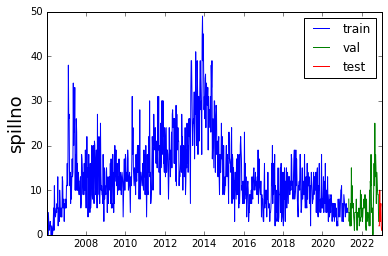

In [ ]:
#plot the train,val,test split (weekly data)

plt.plot(data_train.index,data_train['spillno'])
plt.plot(data_val.index,data_val['spillno'])
plt.plot(data_test.index,data_test['spillno'])
plt.ylabel('spillno',fontsize=18)
plt.legend(['train','val','test'])
plt.show()


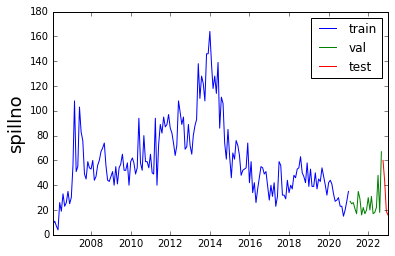

In [51]:
#plot the train,val,test split (weekly data)

plt.plot(data_train2.index,data_train2['spillno'])
plt.plot(data_val2.index,data_val2['spillno'])
plt.plot(data_test2.index,data_test2['spillno'])
plt.ylabel('spillno',fontsize=18)
plt.legend(['train','val','test'])
plt.show()


In [ ]:
data_train.reset_index(inplace=True)
data_val.reset_index(inplace=True)
data_test.reset_index(inplace=True)

In [52]:
data_train2.reset_index(inplace=True)
data_val2.reset_index(inplace=True)
data_test2.reset_index(inplace=True)

In [ ]:
data_train.drop('incidentdate', axis=1, inplace=True)
data_val.drop('incidentdate',axis=1, inplace=True)
data_test.drop('incidentdate',axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [53]:
data_train2.drop('incidentdate', axis=1, inplace=True)
data_val2.drop('incidentdate',axis=1, inplace=True)
data_test2.drop('incidentdate',axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
#Initialize h2o session
h2o.init(nthreads=-1)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,12 hours and 41 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_gsfpb3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# accessing H2OFlow UI
!npm install -g localtunnel -qq > /dev/null

In [ ]:
get_ipython().system_raw('lt --port 54321 >> url.txt 2>&1 &')

In [ ]:
#open the follwoing link to H2OFlow
!cat url.txt

In [ ]:
#Convert pandas dataframes to h2o frames
hf_train = h2o.H2OFrame(data_train)
hf_val  = h2o.H2OFrame(data_val)
hf_test = h2o.H2OFrame(data_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [54]:
#Convert pandas dataframes to h2o frames
hf_train2 = h2o.H2OFrame(data_train2)
hf_val2  = h2o.H2OFrame(data_val2)
hf_test2 = h2o.H2OFrame(data_test2)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
#Select response and features
y = 'spillno'
X = hf_train.columns
X.remove(y)

In [55]:
#Select response and features
y = 'spillno'
X = hf_train2.columns
X.remove(y)

In [ ]:
#Run AutoML
aml = H2OAutoML(max_runtime_secs = 3600,
                seed = 42)
aml.train(x = X, 
          y = y,
          training_frame = hf_train,
          leaderboard_frame = hf_test)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_3_AutoML_1_20230209_71009_model_1


Status of Neuron Layers: predicting spillno, regression, gaussian distribution, Quadratic loss, 941 weights/biases, 16.0 KB, 3,331,830 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms                momentum    mean_weight           weight_rms          mean_bias              bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ----------------------  ----------  --------------------  ------------------  ---------------------  -----------------------
    1        3        Input             15.0
    2        20       RectifierDropout  0.0        0.0   0.0   0.0003501484057172396  0.00047408160753548145  0.0         0.06292371690894166   1.209874153137207   0.4951215014740159     0.5846090316772461
    3        20       RectifierDropout  0.0        0.0   0.0   0.0025118199985513455  0.006575822830200195    0.0         -0.21634765758972208  0.6186580657958984  0.5063333672899537     0.4481525421142578
    4        20       RectifierDropout  0.0        0.0   0.0   0.018696096861513068   0.043720558285713196    0.0         -0.23196236654010136  0.8714437484741211  0.6591366192223005     0.9512548446655273
    5        1        Linear                       0.0   0.0   0.0010595742118312047  0.001002888660877943    0.0         0.3750584512075875    0.945742130279541   -0.031423059048956856  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 23.41024545864702
RMSE: 4.838413527040347
MAE: 3.794253497306739
RMSLE: 0.3888841905051793
Mean Residual Deviance: 23.41024545864702

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 29.728883642502296
RMSE: 5.452419980385067
MAE: 4.165486095960172
RMSLE: 0.4271519311872413
Mean Residual Deviance: 29.728883642502296

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     4.16563   0.183437   4.37195       4.12887       4.15509       3.88874       4.28353
mean_residual_deviance  29.7294   3.07315    30.5004       33.3927       29.7748       24.8697       30.1092
mse                     29.7294   3.07315    30.5004       33.3927       29.7748       24.8697       30.1092
r2                      0.524983  0.0714184  0.44585       0.456875      0.557787      0.612842      0.55156
residual_deviance       29.7294   3.07315    30.5004       33.3927       29.7748       24.8697       30.1092
rmse                    5.44642   0.286822   5.52272       5.77864       5.45663       4.98695       5.48719
rmsle                   0.42652   0.0265293  0.458933      0.401701      0.401295      0.421977      0.448694

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples      training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  -----------  ---------------  -------------------  --------------  -------------
    2023-02-09 08:00:50  0.000 sec                           0         0             0            nan              nan                  nan             nan
    2023-02-09 08:00:50  2 min 17.028 sec  57071 obs/sec     10        1             7990         8.18188          66.9432              6.39533         -0.0584884
    2023-02-09 08:00:55  2 min 22.138 sec  70074 obs/sec     460       46            367540       5.85213          34.2474              4.45731         0.458489
    2023-02-09 08:01:00  2 min 27.198 sec  96218 obs/sec     1240      124           990760       5.26538          27.7242          

In [ ]:
 #Check the leaderboard
## models are ranked by peformance on the test data since we specified a leadboard_frame

lb = aml.leaderboard

lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_grid_3_AutoML_1_20230209_71009_model_1,2.74956,7.56006,2.33583,0.494606,7.56006
StackedEnsemble_BestOfFamily_8_AutoML_1_20230209_71009,2.79757,7.82642,2.52405,0.528351,7.82642
DeepLearning_grid_2_AutoML_1_20230209_71009_model_2,2.83065,8.01255,2.32598,0.487815,8.01255
StackedEnsemble_BestOfFamily_5_AutoML_1_20230209_71009,2.86917,8.23213,2.59994,0.561769,8.23213
StackedEnsemble_BestOfFamily_7_AutoML_1_20230209_71009,2.8891,8.34692,2.6318,0.572311,8.34692
GBM_grid_1_AutoML_1_20230209_71009_model_99,3.01446,9.08695,2.81173,0.614845,9.08695
StackedEnsemble_AllModels_6_AutoML_1_20230209_71009,3.08132,9.49451,2.70292,0.601425,9.49451
XGBoost_grid_1_AutoML_1_20230209_71009_model_139,3.09113,9.55509,2.87176,0.63139,9.55509
DeepLearning_grid_1_AutoML_1_20230209_71009_model_9,3.10082,9.61509,2.24397,0.525574,9.61509
StackedEnsemble_BestOfFamily_4_AutoML_1_20230209_71009,3.15001,9.92257,2.8762,0.647711,9.92257


In [56]:
#Run AutoML
aml = H2OAutoML(max_runtime_secs = 3600,
                seed = 42)
aml.train(x = X, 
          y = y,
          training_frame = hf_train2,
          leaderboard_frame = hf_test2)


AutoML progress: |
09:28:26.103: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 180.0.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_3_AutoML_2_20230209_92825_model_1


Status of Neuron Layers: predicting spillno, regression, gaussian distribution, Quadratic loss, 921 weights/biases, 15.6 KB, 1,569,600 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight           weight_rms           mean_bias           bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  --------------------  -------------------  ------------------  -----------------------
    1        2        Input             15.0
    2        20       RectifierDropout  0.0        0.0   0.0   0.0004702112551058235  0.0004038719926029444  0.0         -0.09672518097795546  0.7602255344390869   0.6001921956058022  0.7428622245788574
    3        20       RectifierDropout  0.0        0.0   0.0   0.0033198526615797162  0.014619939029216766   0.0         -0.10492410290084081  0.46184074878692627  0.906502687037724   0.37140536308288574
    4        20       RectifierDropout  0.0        0.0   0.0   0.012307902075153834   0.024173900485038757   0.0         -0.19802362370013726  0.7032485008239746   0.6592279045097429  0.3130049705505371
    5        1        Linear                       0.0   0.0   0.0026482097477128264  0.0030477913096547127  0.0         0.2076817773282528    1.0846471786499023   1.8844955594191213  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 320.1165361227065
RMSE: 17.89180080714925
MAE: 10.699126584672351
RMSLE: 0.3130269039652875
Mean Residual Deviance: 320.1165361227065

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 490.84534112932533
RMSE: 22.15502970274076
MAE: 15.765867396579877
RMSLE: 0.41886290383149377
Mean Residual Deviance: 490.84534112932533

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     15.7659   3.85025    18.6545       17.2882       13.877        19.0812       9.92834
mean_residual_deviance  490.845   273.683    784.253       556.235       268.138       697.015       148.587
mse                     490.845   273.683    784.253       556.235       268.138       697.015       148.587
r2                      0.461589  0.225167   0.25977       0.343652      0.629528      0.304652      0.770342
residual_deviance       490.845   273.683    784.253       556.235       268.138       697.015       148.587
rmse                    21.3109   6.7721     28.0045       23.5846       16.3749       26.401        12.1896
rmsle                   0.410386  0.0937409  0.474581      0.397608      0.385412      0.519417      0.27491

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples     training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  ----------  ---------------  -------------------  --------------  -------------
    2023-02-09 10:18:37  0.000 sec                           0         0             0           nan              nan                  nan             nan
    2023-02-09 10:18:37  1 min 29.990 sec  52941 obs/sec     10        1             1800        34.491           1189.63              28.4243         -0.385208
    2023-02-09 10:18:42  1 min 35.000 sec  78897 obs/sec     2210      221           397800      28.9667          839.071              22.5108         0.0229821
    2023-02-09 10:18:47  1 min 40.009 sec  73089 obs/sec     4080      408           734400      17.1354          293.623              12.4819         

In [57]:
 #Check the leaderboard
## models are ranked by peformance on the test data since we specified a leadboard_frame

lb = aml.leaderboard

lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_grid_3_AutoML_2_20230209_92825_model_1,16.7482,280.502,13.0442,0.412003,280.502
DeepLearning_1_AutoML_2_20230209_92825,16.7557,280.753,15.7763,0.523629,280.753
DeepLearning_grid_1_AutoML_2_20230209_92825_model_23,17.3633,301.484,16.2827,0.517735,301.484
GBM_grid_1_AutoML_2_20230209_92825_model_902,17.604,309.902,16.6726,0.540142,309.902
GBM_grid_1_AutoML_2_20230209_92825_model_252,17.6369,311.06,16.6964,0.538763,311.06
DeepLearning_grid_1_AutoML_2_20230209_92825_model_25,17.8398,318.259,16.3912,0.512473,318.259
GBM_grid_1_AutoML_2_20230209_92825_model_430,17.9034,320.531,16.8495,0.536044,320.531
GBM_grid_1_AutoML_2_20230209_92825_model_905,17.921,321.163,16.866,0.537047,321.163
GBM_grid_1_AutoML_2_20230209_92825_model_321,17.9443,321.997,16.9272,0.542074,321.997
XGBoost_lr_search_selection_AutoML_2_20230209_92825_select_grid_model_8,18.0384,325.384,16.9733,0.552015,325.384
